# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from IPython.display import display
np.set_printoptions(suppress=True)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [32]:
pd.set_option('display.float_format', '{:.3f}'.format)

df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [34]:
X = df[['TV', 'radio', 'newspaper']].to_numpy(dtype='float')
y = df['sales'].to_numpy(dtype='float')

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [35]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
X[:10]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2]])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [36]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм:**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
    $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
    $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
    
    или в векторном виде:
    
    $$\hat{y} = Xw$$
    $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [37]:
# создадим нулевой вектор весов:
w = [0.0, 0.0, 0.0, 0.0]

# реализуем шаги алгоритма:
r = y - X @ w

for i in range(1000):
    for j in range(len(w)):
        r = r + X[:,j] * w[j]
        w[j] = X[:,j] @ r
        r = r - X[:,j] * w[j]


# запомним вектор весов, чтобы в конце сравнить показатели
w_coord_desc = w

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [38]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print('Сравним результаты:\n')

print('Вектор коэффициентов, полученных методом координатного спуска:')
print(np.round(w_coord_desc, 5), '\n')

print('Вектор коэффициентов из модели линейной регрессии:')
print(np.round(model.coef_, 5))

Сравним результаты:

Вектор коэффициентов, полученных методом координатного спуска:
[ 41.56217 110.13144  73.52861  -0.55006] 

Вектор коэффициентов из модели линейной регрессии:
[ 41.56217 110.13144  73.52861  -0.55006]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [39]:
X = df[['TV', 'radio', 'newspaper']]
X = (X-X.mean())/X.std()

# проверим, что среднее значение и стандартное отклонение каждого столбца равны 0 и 1 соответственно:
print(X.mean())
print(X.std())

X = X.to_numpy(dtype='float')

TV           0.000
radio       -0.000
newspaper    0.000
dtype: float64
TV          1.000
radio       1.000
newspaper   1.000
dtype: float64


**Добавим единичный столбец**

In [40]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [41]:
def mse_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [42]:
# наивный прогноз:
y_naive = [np.mean(y)] * len(y)

# среднеквадратичная ошибка для этого прогноза:
mse_naive = mse_error(y, y_naive)

print(f'Cреднеквадратичная ошибка для наивного прогноза: {round(mse_naive, 3)}')

Cреднеквадратичная ошибка для наивного прогноза: 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [43]:
# т.к. ранее в матрицу предикторов был добавлен единичный столбец,
# ориентируемся на этот размер матрицы:
def lin_pred(X, w):
    return X.dot(w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [44]:
def stoch_grad_step(X, y, w, train_ind, eta):
    diff = np.dot(X[train_ind], w) - y[train_ind]
    direction = X[train_ind, :] * 2 * diff / len(y)
    return  w - direction * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [45]:
def stochastic_gradient_descent(X, y, w_start, eta, max_iter=1000, min_weight_dist=0.00000001):
    # инициализируем расстояние между векторами весов бесконечностью:
    weight_dist = np.inf

    # создадим пустой список для фиксации ошибок:
    errors = []

    # создадим счетчик итераций:
    i = 0

    # запишем начальную ошибку в вектор ошибок:
    w = w_start

    # для воспроизводимости кода:
    np.random.seed(42)

    # реализуем основной цикл обучения пока расстояние между векторами весов больше того,
    # при котором надо прекратить работу и количество итераций меньше максимально разрешенного:
    while weight_dist > min_weight_dist and i < max_iter:
        # сгенерируем случайный индекс
        random_index = np.random.randint(len(y))

        # текущая ошибка:
        w_current = w

        # запишем в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее:
        w = stoch_grad_step(X, y, w_current, random_index, eta)

        # текущее расстояние между векторами весов:
        weight_dist = np.linalg.norm(w - w_current)

        # запишем ошибку в вектор ошибок:
        errors.append(mse_error(lin_pred(X, w), y))

        i += 1

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [46]:
w_start = [0, 0, 0, 0]
iter = 100000

w_stoch_desc, errors = stochastic_gradient_descent(X, y, w_start, max_iter=iter, eta=0.01)

print(len(errors))

63636


**Постройте график зависимости ошибки от номера итерации**

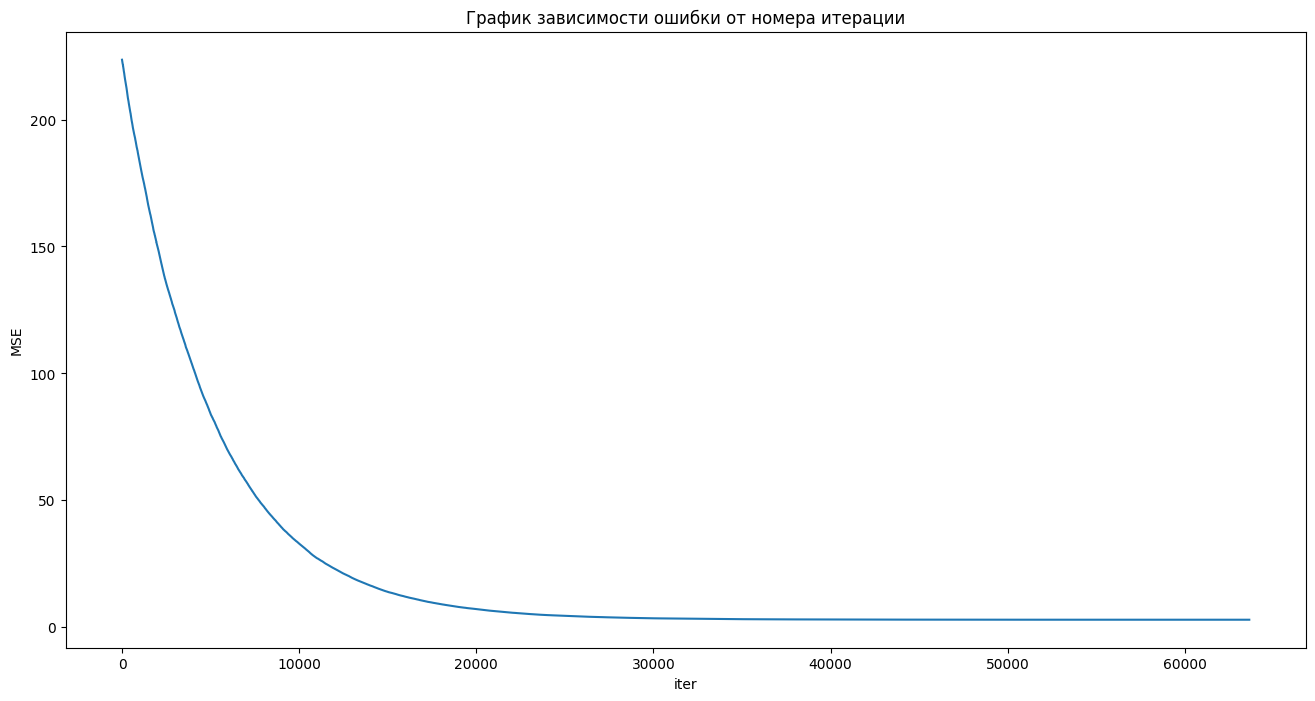

In [47]:
fig = plt.figure(figsize=(16,8))
plt.plot(errors)

plt.title('График зависимости ошибки от номера итерации')
plt.ylabel('MSE')
plt.xlabel('iter');

**Выведите вектор весов, к которому сошелся метод.**

In [48]:
print(f'Вектор весов, на котором сошелся метод: {np.round(w_stoch_desc, 4)}')

Вектор весов, на котором сошелся метод: [13.9904  3.8917  2.7923  0.0062]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [49]:
print(f'MSE на последней итерации: {round(errors[-1], 3)}')

MSE на последней итерации: 2.787


## Оценим качество полученных моделей с помощью MSE и MAE

In [50]:
# методом координатного спуска:
y_coord_desc = lin_pred(X, w_coord_desc)

# методом стохастического градиентного спуска:
y_stoch_desc = lin_pred(X, w_stoch_desc)


print(f'MSE для прогноза методом координатного спуска: {round(mse_error(y, y_coord_desc), 3)}')
print(f'MSE для прогноза методом стохастического градиентного спуска: {round(mse_error(y, y_stoch_desc), 3)}')


def mae_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


print(f'MAE для прогноза методом координатного спуска: {round(mae_error(y, y_coord_desc), 3)}')
print(f'MAE для прогноза методом стохастического градиентного спуска: {round(mae_error(y, y_stoch_desc), 3)}')

MSE для прогноза методом координатного спуска: 17748.379
MSE для прогноза методом стохастического градиентного спуска: 2.787
MAE для прогноза методом координатного спуска: 111.234
MAE для прогноза методом стохастического градиентного спуска: 1.259


## Предсказание методом стохастического градиентного спуска оказалось в разы точнее предсказания методом координатного спуска.